# Welcome to the Gradient Descent workbook.

## Live Gradient Descent project

This notebook is designed to **Create a functioning workflow for numerical optimasation of controll paramiters of the **FENN** code. 

### Getting Started

### Contact

For any questions please reach out to **Adam Cole** (acole32@vols.utk.edu)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

#Establish domain

#Generate random point

#Create "stepped" points 

#Shell commands:
#Modifly FENN
#Compile FENN

#Extract data, delete the rest

#Evaluate cost fuction

#Perform gradient descent/ find updated parameters

#Repeat from step 3

#Check for convergence

#Plots

file_path = "/home/ojc/Downloads/UTKCAP/FENN/simulation_log.txt"

In [2]:
#Establish domain

EpsA_range=(1.0e-01, 1.0e-06)#Hi to Low
EpsR_range=(1.0e-01, 1.0e-06) 

EpsA_range = [float(x) for x in EpsA_range]
EpsR_range = [float(x) for x in EpsR_range]

print(EpsA_range)
print(EpsR_range)

#pick random points
EpsA= np.random.uniform(*EpsA_range)
EpsR= np.random.uniform(*EpsR_range)

print(EpsA)
print(EpsR)

#tune accuracy
n = 4

Step = (max(EpsA_range)-min(EpsA_range))/n

#Other parameters

learning_rate = 0.9
Convergence_Tol = 0.9

i = 0
i = int(i)

[0.1, 0.0001]
[0.1, 0.0001]
0.02031975558299924
0.04068833279465489


In [3]:
#Change working directory!

os.chdir('/home/ojc/Downloads/UTKCAP/FENN')

#Initialize

EpsA_array = []
EpsR_array = []
t_array = []
ERR_array = []
Cost_array = []

#Convergence Test Loop

while True:

#Step points

    EpsA_forward = EpsA + Step
    EpsR_forward = EpsR + Step

    EpsA_backward = EpsA - Step
    EpsR_backward = EpsR - Step
    
#Shell Scripts- for BOTH step forward and back

    !g++ /home/ojc/Downloads/UTKCAP/FENN/Networks.cpp -o FENN \
        -I/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/include \
        -I/usr/include/eigen3 \
        -L/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/lib \
        -Wl,-rpath,/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/lib \
        -lhdf5_cpp -lhdf5

#---------------------------------------------- Forward ------------------------------------------------------

# Modify Networks.cpp to update EpsA and EpsR values

#Compile FENN
    
    !rm -f /home/ojc/Downloads/UTKCAP/FENN/simulation_log.txt
    
    !./FENN {EpsA_value} {TolC_value} > /dev/null 2>&1
    
#Read from FENN/ Extract t and ERR - Based off of Perform_Experiment.sh
    
    with open(file_path, 'r') as file:
        for line in file:
            if "Wall-clock time:" in line:
                t_forward = line.split(":")[1].strip() 
            if "Accumulated Error:" in line:
                ERR_forward = line.split(":")[1].strip() 
                
#Fixing time units
                
#Forward
    
    print(t_forward)
    
    if isinstance(t_forward, float):
        continue  
    
    value, unit = t_forward.split()
    
    if unit == 'microseconds':
            unit = 1.0e-6
    else:
        print('error in time units')
    
    value = float(value)
    t_forward = value * unit

    print(t_forward)

    ERR_forward = float(ERR_forward)

#---------------------------------------------- Backward ------------------------------------------------------
                
# Modify Networks.cpp to update EpsA and EpsR values

#Compile FENN
    
    !rm -f /home/ojc/Downloads/UTKCAP/FENN/simulation_log.txt
    
    !./FENN {EpsA_value} {TolC_value} > /dev/null 2>&1
    
#Read from FENN/ Extract t and ERR - Based off of Perform_Experiment.sh
    
    with open(file_path, 'r') as file:
        for line in file:
            if "Wall-clock time:" in line:
                t_backward = line.split(":")[1].strip() 
            if "Accumulated Error:" in line:
                ERR_backward = line.split(":")[1].strip()
                
#Fixing time units
    
#Backward
    
    print(t_backward)
    
    if isinstance(t_backward, float):
        continue  
    
    value, unit = t_backward.split()
    
    if unit == 'microseconds':
            unit = 1.0e-6
    else:
        print('error in time units')
    
    value = float(value)
    t_backward = value * unit

    print(t_backward)

    ERR_backward = float(ERR_backward)

#Compute the Cost function  

#Forward
    
    Cost_forward = np.sqrt(t_forward**2 + ERR_forward**2)

#Backward
    
    Cost_backward = np.sqrt(t_backward**2 + ERR_backward**2)

#Centered Difference Approximation of f'

    Cost_grad = (Cost_forward - Cost_backward)/(2*Step)

#Store values for plots

    EpsA_array.append(EpsA)
    EpsR_array.append(EpsR)
    
    t_array.append((t_forward + t_backward)/2)
    ERR_array.append((ERR_forward) + (ERR_backward)/2)
    
    speed_array.append((speed_forward + speed_backward)/2)
    Cost_array.append(Cost_grad)
    
#Evaluate Gradient Descent

    EpsA = EpsA - learning_rate * Cost_grad
    EpsR = EpsR - learning_rate * Cost_grad

#Step
    
    i = i + 1
    
#Convergence Test

    if abs(Cost_grad) < Convergence_Tol:
        break #CONVERGENCE TEST
        

448928 microseconds
0.448928
695460 microseconds
0.69546
1726285 microseconds
1.7262849999999998
737795 microseconds
0.737795


In [4]:
print(EpsA_array)
print(EpsR_array)
print(t_array)
print(ERR_array)
print(speed_array)
print(Cost_array)

[0.02031975558299924, -15940.161580708194]
[0.04068833279465489, -15940.141212130984]
[0.572194, 1.23204]
[982.44065, 441783000.0]
[0.572194, 1.23204]
[17711.31322273753, 0.0]


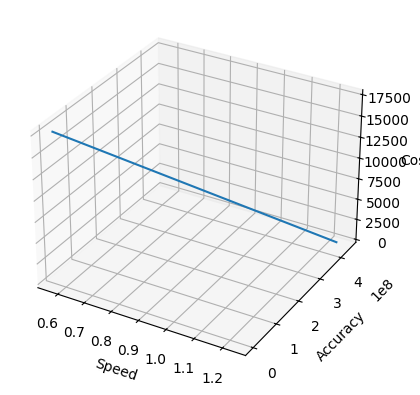

In [5]:
#3D plots

x = speed_array
y = ERR_array
z = Cost_array

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
ax.plot(x, y, z)

# Set labels
ax.set_xlabel('Speed')
ax.set_ylabel('Accuracy')
ax.set_zlabel('Cost')

# Show the plot
plt.show()

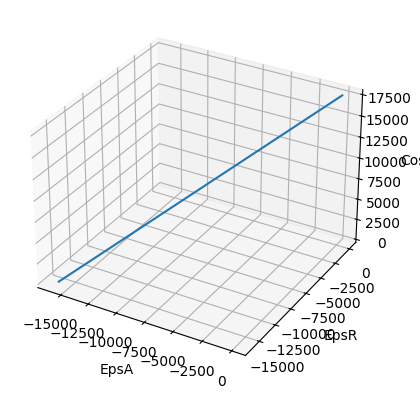

In [6]:
#3D plots

x = EpsA_array
y = EpsR_array
z = Cost_array

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
ax.plot(x, y, z)

# Set labels
ax.set_xlabel('EpsA')
ax.set_ylabel('EpsR')
ax.set_zlabel('Cost')

# Show the plot
plt.show()

In [7]:
#SAVING

import json

data = {
    "EpsA_array": EpsA_array,
    "EpsR_array": EpsR_array,
    "ERR_array": ERR_array,
    "t_array": t_array,
    "speed": speed_array,
    "ERR_array": ERR_array,
    "Cost_array": Cost_array
}

with open('data.json', 'w') as f:
    json.dump(data, f)
